In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV



In [2]:
df=pd.read_csv("secom_xgb.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
df

,Pass/Fail,v0,v1,v10,v102,v103,v107,v113,v115,v117,...,v79,v8,v81,v84,v86,v87,v90,v96,v98,v99
0,0,0.212406,0.758095,-0.330435,1.962264,1.638889,-2.545642,-0.029197,-0.040351,-0.102544,...,-0.387234,0.369772,-2.466145,-0.153846,-0.278261,-1.666667,-0.304514,-1.351145,0.978938,-0.421141
1,0,0.933964,-0.393315,-1.321739,-1.088534,1.555556,0.796287,-0.284672,-0.351688,0.102890,...,-1.557447,0.332700,-1.195242,0.430769,-0.550725,0.171171,-0.860221,2.770992,-2.303978,-0.265101
2,0,-0.257246,-0.221407,-0.321739,-1.011611,1.166667,-0.498195,0.729927,-0.749203,0.098996,...,2.842553,0.252852,1.513788,-0.430769,-0.067633,0.261261,-1.282571,0.174141,0.043601,-0.327181
3,0,0.226982,0.046122,-0.660870,1.013062,1.555556,-0.824136,-0.291971,0.820203,-0.141312,...,0.110638,0.394487,0.503754,0.184615,0.948792,0.243243,0.414045,1.022424,-1.651435,-0.280201
4,0,-0.729791,-0.769509,0.443478,0.387518,1.361111,-2.682826,-0.270073,-0.049727,0.092506,...,-0.144681,0.637833,0.584022,1.338462,-0.568116,0.117117,-1.987431,0.896469,-0.551792,-0.703020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,-0.260918,-0.060447,-0.026087,0.767779,-0.194444,-1.112945,-0.956204,1.215924,-1.132572,...,0.361702,0.630228,-0.191898,-0.753846,-0.786473,0.072072,0.733834,0.819179,-1.138071,-0.577181
1563,1,0.457747,0.193338,-0.539130,-0.635704,1.055556,-0.846828,0.583942,-0.407614,-0.402821,...,-1.442553,-0.523764,0.456932,-0.461538,0.879227,-0.090090,-0.423207,-0.724714,-0.863407,-0.671141
1564,1,-0.667594,-0.253669,-0.373913,-0.341074,-0.361111,-0.157813,0.153285,-0.269021,-0.181637,...,0.217021,-0.002852,0.831514,0.261538,0.206763,0.180180,0.094760,0.749046,-0.799852,0.500000
1565,1,1.795160,-0.818425,-0.530435,0.557329,0.416667,-1.129448,-0.532847,0.400953,-0.550104,...,-0.165957,1.384981,0.309774,-0.092308,0.805797,0.153153,0.000000,-0.366412,-0.178347,0.686242


In [4]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

## SMOTE

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1096, 186) (1096,)

오버샘플링 후 : (2046, 186) (2046,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 1    1023
0    1023
dtype: int64


Class=0, n=1023 (65.284%)
Class=1, n=73 (4.659%)


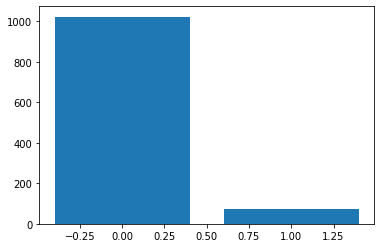

In [7]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1023 (65.284%)
Class=1, n=1023 (65.284%)


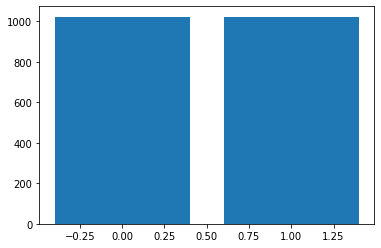

In [8]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [9]:
df=pd.DataFrame(y_train_over)
df.columns = ['Pass/Fail']
df=pd.concat([df,x_train_over], axis=1)
df

,Pass/Fail,v0,v1,v10,v102,v103,v107,v113,v115,v117,...,v79,v8,v81,v84,v86,v87,v90,v96,v98,v99
0,0,0.343366,-1.674819,0.391304,0.152395,-1.361111,-0.738525,0.109489,-0.348598,0.380582,...,0.604255,0.191065,-0.205276,-0.507692,-0.544928,-2.306306,-0.796196,-2.175573,2.290676,-0.983221
1,0,0.906481,-0.490217,-0.408696,1.847605,-0.305556,-0.174317,-0.021898,0.123173,-0.494116,...,-0.425532,-0.397338,0.416798,0.553846,-0.790338,-0.054054,0.000000,-1.557252,1.736913,-0.562081
2,0,-0.337691,0.441533,0.478261,-0.211901,-1.388889,-0.230015,1.240876,-0.455494,-0.404638,...,-0.714894,1.386882,-1.028018,-0.923077,0.000000,-1.684685,-0.239398,0.661260,-0.095825,-0.624161
3,0,-1.402392,1.259026,-0.573913,0.573295,-1.055556,1.817432,0.240876,0.334313,-0.351419,...,-0.565957,0.281369,0.697734,0.384615,0.713043,-1.882883,1.128807,-0.270992,0.688262,-0.015101
4,0,0.654131,-1.408572,-0.608696,0.120464,0.472222,-0.064982,-0.795620,1.782400,-0.095794,...,0.042553,-0.230038,-0.031363,-0.923077,-0.885024,-1.684685,2.220649,-0.391221,-0.047789,0.140940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1,-1.148796,0.086136,0.666200,1.202191,0.670732,-0.004881,0.196392,0.048856,0.300650,...,1.145926,-0.073215,0.703528,0.718000,-1.117004,-0.961883,-0.138981,0.257981,-0.339070,0.289165
2042,1,0.370864,-0.968888,-0.153139,-0.134507,0.666667,-0.675728,-0.098875,0.470890,0.080683,...,0.855100,-0.102271,-0.227902,-0.498594,0.004356,-2.111068,0.430071,-0.005890,-0.831733,-0.984004
2043,1,0.293850,0.166827,0.816235,-0.893341,0.592736,0.077420,0.067584,-2.194631,-0.263738,...,-0.711166,0.319964,1.997125,0.026980,-0.055465,-1.378220,-0.458775,-0.231287,0.120514,-1.114219
2044,1,-0.481706,-0.376694,0.427561,0.834918,0.968873,0.268253,-0.136101,0.125155,0.382853,...,1.761937,0.296497,-0.640529,-1.004322,-0.128996,0.189698,-0.218080,-0.184930,0.100319,0.248240


In [10]:
xgb = XGBClassifier(random_state=42)
xgb_parameters = {'n_estimators':[120, 150, 170], 'learning_rate':[0.07, 0.1,0.15], 'max_depth':[2, 3, 4]}
xgb_grid = GridSearchCV(xgb, param_grid=xgb_parameters,scoring=make_scorer(recall_score),  cv=3, refit=True)
xgb_grid.fit(x_train_over, y_train_over)
print('최적 하이퍼 파라미터: ', xgb_grid.best_params_)
print('최고 예측 정확도: {:.4f}'.format(xgb_grid.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 150}
최고 예측 정확도: 0.9951


In [11]:
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(**xgb_grid.best_params_,min_child_weight=10,gamma=10,subsample=0.1,colsample_bytree=0.1)
xgb_wrapper.fit(x_train_over , y_train_over,  early_stopping_rounds=10, eval_set = evals, eval_metric="logloss",  verbose=True)
xgb_wrapper.fit(x_train_over, y_train_over)

preds = xgb_wrapper.predict(X_test) 
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.68624
[1]	validation_0-logloss:0.68085
[2]	validation_0-logloss:0.67531
[3]	validation_0-logloss:0.67424
[4]	validation_0-logloss:0.66496
[5]	validation_0-logloss:0.65587
[6]	validation_0-logloss:0.65450
[7]	validation_0-logloss:0.65716
[8]	validation_0-logloss:0.65230
[9]	validation_0-logloss:0.64675
[10]	validation_0-logloss:0.63967
[11]	validation_0-logloss:0.64112
[12]	validation_0-logloss:0.63021
[13]	validation_0-logloss:0.62208
[14]	validation_0-logloss:0.61071


C:\Users\82104\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
C:\Users\82104\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[15]	validation_0-logloss:0.61123
[16]	validation_0-logloss:0.61055
[17]	validation_0-logloss:0.61684
[18]	validation_0-logloss:0.60515
[19]	validation_0-logloss:0.60103
[20]	validation_0-logloss:0.60510
[21]	validation_0-logloss:0.60825
[22]	validation_0-logloss:0.60592
[23]	validation_0-logloss:0.59924
[24]	validation_0-logloss:0.60152
[25]	validation_0-logloss:0.59383
[26]	validation_0-logloss:0.59054
[27]	validation_0-logloss:0.58622
[28]	validation_0-logloss:0.57931
[29]	validation_0-logloss:0.58277
[30]	validation_0-logloss:0.57678
[31]	validation_0-logloss:0.57248
[32]	validation_0-logloss:0.57395
[33]	validation_0-logloss:0.57560
[34]	validation_0-logloss:0.57411
[35]	validation_0-logloss:0.56643
[36]	validation_0-logloss:0.56675
[37]	validation_0-logloss:0.56142
[38]	validation_0-logloss:0.56296
[39]	validation_0-logloss:0.55529
[40]	validation_0-logloss:0.55926
[41]	validation_0-logloss:0.55822
[42]	validation_0-logloss:0.55751
[43]	validation_0-logloss:0.55599
[44]	validatio

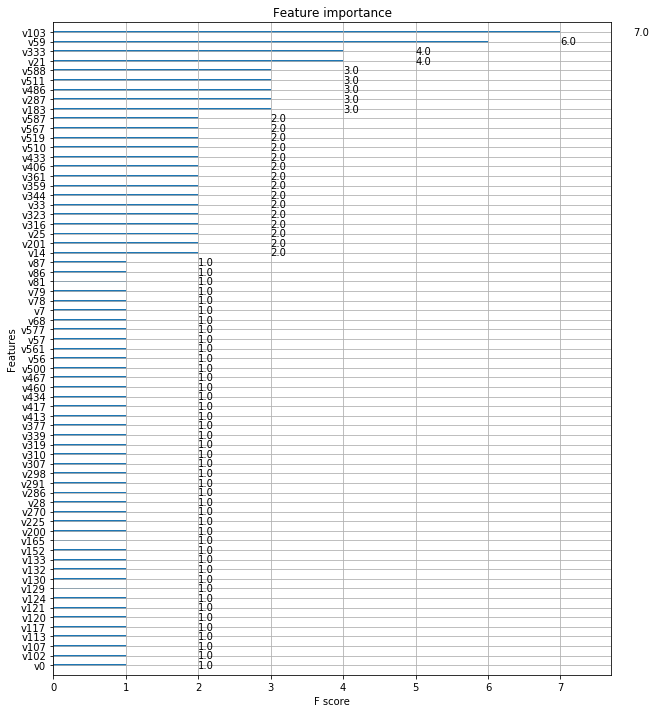

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12)) 
plot_importance(xgb_wrapper, ax=ax)
#피처의 중요도를 시각화하는 모듈

In [14]:
print(" 정 확 도 : {0:.4f}".format(accuracy_score(y_test,preds)))

 정 확 도 : 0.8323


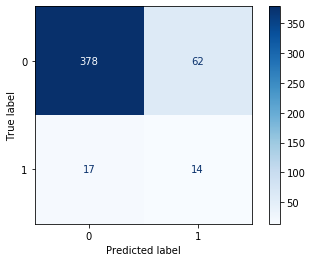

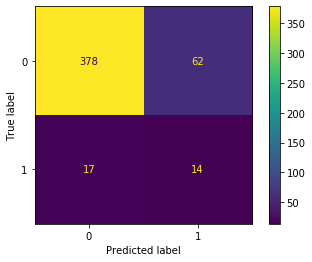

In [15]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds, labels=xgb_wrapper.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb_wrapper.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[378  62]
 [ 17  14]]
trainset 정확도:  0.8641251221896383
testset 정확도:  0.832271762208068
accuracy=  0.832271762208068
precision=  0.18421052631578946
recall=  0.45161290322580644
f1 score=  0.26168224299065423
교차 검증=  0.9341993281075028
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       440
           1       0.18      0.45      0.26        31

    accuracy                           0.83       471
   macro avg       0.57      0.66      0.58       471
weighted avg       0.91      0.83      0.86       471



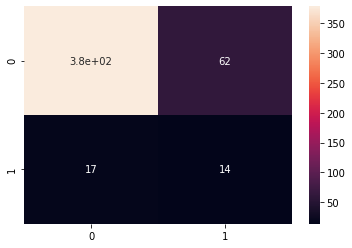

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
print('confusion matrix=\n',confusion_matrix(y_true=y_test,y_pred=preds))
print('trainset 정확도: ',xgb_wrapper.score(x_train_over,y_train_over)) #trainset 정확도
print('testset 정확도: ',xgb_wrapper.score(X_test,y_test)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=y_test,y_pred=preds))
print('precision= ',precision_score(y_true=y_test,y_pred=preds))
print('recall= ',recall_score(y_true=y_test,y_pred=preds))
print('f1 score= ',f1_score(y_true=y_test,y_pred=preds))
print('교차 검증= ',cross_val_score(xgb_wrapper,X_test,y_test).mean())
print(classification_report(y_test,preds))
heat=pd.DataFrame(confusion_matrix(y_test,preds))
sns.heatmap(heat,annot=True)

In [17]:
from sklearn.metrics import classification_report
y_pred = xgb_wrapper.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       440
           1       0.18      0.45      0.26        31

    accuracy                           0.83       471
   macro avg       0.57      0.66      0.58       471
weighted avg       0.91      0.83      0.86       471



In [18]:
fpr,tpr,thresholds=roc_curve(y_test,preds,pos_label=1)

Auc: 0.6553519061583578


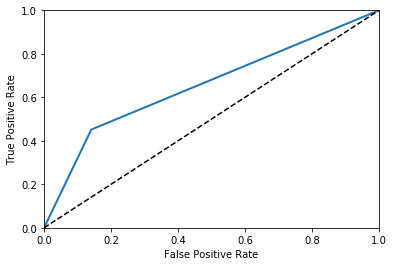

In [19]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, linewidth = 2)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
auc=np.trapz(tpr,fpr)
print("Auc:",auc)

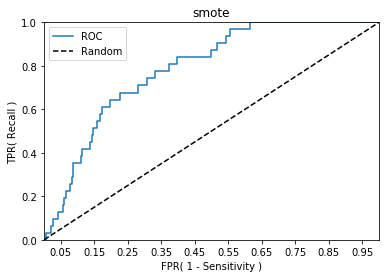

In [20]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(y_test, xgb_wrapper.predict_proba(X_test)[:, 1] )

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [21]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1023, 1: 73})
Resampled dataset shape Counter({1: 1036, 0: 1023})
오버샘플링 전 : (1096, 186) (1096,)

오버샘플링 후 : (2059, 186) (2059,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 1    1036
0    1023
dtype: int64


In [22]:
df=pd.DataFrame(y_res)
df.columns = ['Pass/Fail']
df=pd.concat([df,X_res], axis=1)
df

,Pass/Fail,v0,v1,v10,v102,v103,v107,v113,v115,v117,...,v79,v8,v81,v84,v86,v87,v90,v96,v98,v99
0,0,0.343366,-1.674819,0.391304,0.152395,-1.361111,-0.738525,0.109489,-0.348598,0.380582,...,0.604255,0.191065,-0.205276,-0.507692,-0.544928,-2.306306,-0.796196,-2.175573,2.290676,-0.983221
1,0,0.906481,-0.490217,-0.408696,1.847605,-0.305556,-0.174317,-0.021898,0.123173,-0.494116,...,-0.425532,-0.397338,0.416798,0.553846,-0.790338,-0.054054,0.000000,-1.557252,1.736913,-0.562081
2,0,-0.337691,0.441533,0.478261,-0.211901,-1.388889,-0.230015,1.240876,-0.455494,-0.404638,...,-0.714894,1.386882,-1.028018,-0.923077,0.000000,-1.684685,-0.239398,0.661260,-0.095825,-0.624161
3,0,-1.402392,1.259026,-0.573913,0.573295,-1.055556,1.817432,0.240876,0.334313,-0.351419,...,-0.565957,0.281369,0.697734,0.384615,0.713043,-1.882883,1.128807,-0.270992,0.688262,-0.015101
4,0,0.654131,-1.408572,-0.608696,0.120464,0.472222,-0.064982,-0.795620,1.782400,-0.095794,...,0.042553,-0.230038,-0.031363,-0.923077,-0.885024,-1.684685,2.220649,-0.391221,-0.047789,0.140940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,1,0.527293,0.240996,-0.335069,-0.142746,0.583025,0.492546,0.039816,-0.384983,-1.114491,...,-0.770304,-0.037234,0.737736,0.361534,-0.593631,-0.906074,0.304567,0.003806,-0.668550,-0.561792
2055,1,0.358056,0.739502,-0.663120,0.379728,0.251508,0.449178,-0.395593,-1.092183,-1.602637,...,-0.639363,-0.278051,0.465506,0.363160,0.144072,-1.981173,-0.000370,0.038519,-0.836699,-0.058000
2056,1,-1.066430,0.348914,0.756647,0.531750,-0.321677,0.260695,-0.088384,-0.280031,-0.356567,...,0.483737,-0.069386,1.396151,0.964477,-0.709726,-0.115539,0.220523,0.033789,-0.070649,0.311050
2057,1,0.532708,0.622569,-0.629077,0.077851,0.267035,0.517643,-0.299240,-0.937971,-1.608027,...,-0.864429,-0.203640,0.602463,0.356672,-0.006836,-1.592143,0.149326,-0.007048,-0.789123,-0.265949


In [23]:
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(**xgb_grid.best_params_,min_child_weight=10,gamma=10,subsample=0.1,colsample_bytree=0.1)
xgb_wrapper.fit(X_res , y_res,  early_stopping_rounds=10, eval_set = evals, eval_metric="logloss",  verbose=True)
xgb_wrapper.fit(X_res, y_res)

preds = xgb_wrapper.predict(X_test) 
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.68878
[1]	validation_0-logloss:0.68804
[2]	validation_0-logloss:0.68703
[3]	validation_0-logloss:0.69022
[4]	validation_0-logloss:0.67721


C:\Users\82104\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
C:\Users\82104\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[5]	validation_0-logloss:0.66245
[6]	validation_0-logloss:0.65135
[7]	validation_0-logloss:0.65229
[8]	validation_0-logloss:0.64939
[9]	validation_0-logloss:0.64731
[10]	validation_0-logloss:0.63225
[11]	validation_0-logloss:0.62816
[12]	validation_0-logloss:0.62067
[13]	validation_0-logloss:0.62051
[14]	validation_0-logloss:0.61780
[15]	validation_0-logloss:0.61466
[16]	validation_0-logloss:0.61312
[17]	validation_0-logloss:0.60985
[18]	validation_0-logloss:0.60385
[19]	validation_0-logloss:0.59725
[20]	validation_0-logloss:0.59372
[21]	validation_0-logloss:0.59539
[22]	validation_0-logloss:0.59080
[23]	validation_0-logloss:0.58733
[24]	validation_0-logloss:0.58671
[25]	validation_0-logloss:0.58694
[26]	validation_0-logloss:0.58767
[27]	validation_0-logloss:0.58089
[28]	validation_0-logloss:0.56938
[29]	validation_0-logloss:0.57105
[30]	validation_0-logloss:0.56473
[31]	validation_0-logloss:0.56451
[32]	validation_0-logloss:0.56369
[33]	validation_0-logloss:0.56444
[34]	validation_0-l

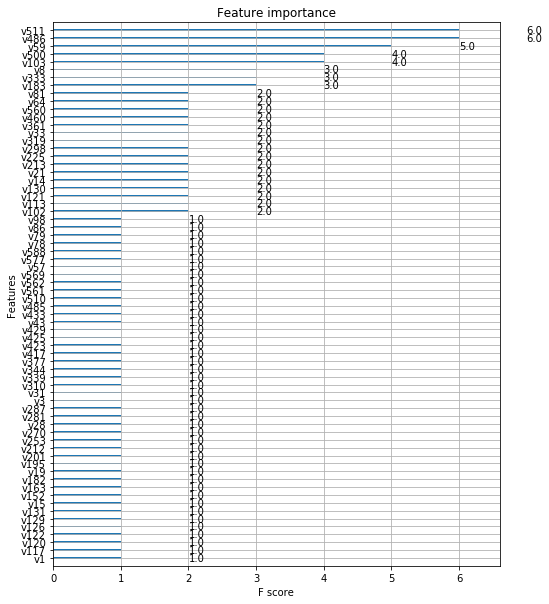

In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 10)) 
plot_importance(xgb_wrapper, ax=ax)
#피처의 중요도를 시각화하는 모듈

In [103]:
print(" 정 확 도 : {0:.4f}".format(accuracy_score(y_test,preds)))

 정 확 도 : 0.8450


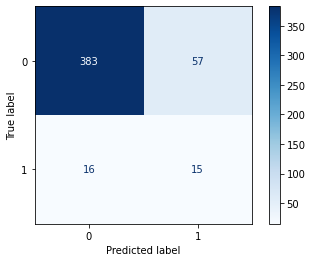

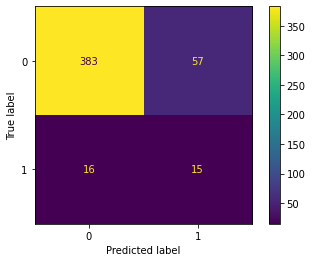

In [104]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds, labels=xgb_wrapper.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb_wrapper.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[383  57]
 [ 16  15]]
trainset 정확도:  0.8800388538125303
testset 정확도:  0.8450106157112527
accuracy=  0.8450106157112527
precision=  0.20833333333333334
recall=  0.4838709677419355
f1 score=  0.2912621359223301
교차 검증=  0.9341993281075028
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       440
           1       0.21      0.48      0.29        31

    accuracy                           0.85       471
   macro avg       0.58      0.68      0.60       471
weighted avg       0.91      0.85      0.87       471



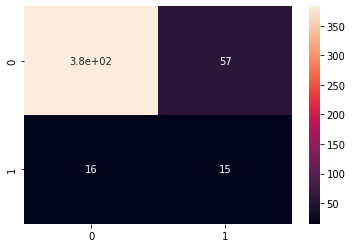

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
print('confusion matrix=\n',confusion_matrix(y_true=y_test,y_pred=preds))
print('trainset 정확도: ',xgb_wrapper.score(X_res,y_res)) #trainset 정확도
print('testset 정확도: ',xgb_wrapper.score(X_test,y_test)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=y_test,y_pred=preds))
print('precision= ',precision_score(y_true=y_test,y_pred=preds))
print('recall= ',recall_score(y_true=y_test,y_pred=preds))
print('f1 score= ',f1_score(y_true=y_test,y_pred=preds))
print('교차 검증= ',cross_val_score(xgb_wrapper,X_test,y_test).mean())
print(classification_report(y_test,preds))
heat=pd.DataFrame(confusion_matrix(y_test,preds))
sns.heatmap(heat,annot=True)

In [106]:
fpr,tpr,thresholds=roc_curve(y_test,preds,pos_label=1)

Auc: 0.6771627565982405


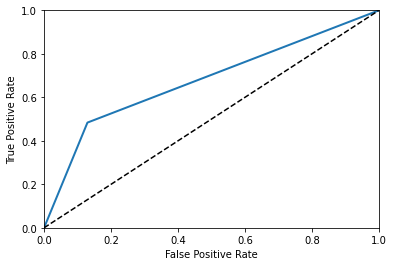

In [107]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, linewidth = 2)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
auc=np.trapz(tpr,fpr)
print("Auc:",auc)

In [108]:
from sklearn.metrics import classification_report
y_pred = xgb_wrapper.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       440
           1       0.21      0.48      0.29        31

    accuracy                           0.85       471
   macro avg       0.58      0.68      0.60       471
weighted avg       0.91      0.85      0.87       471



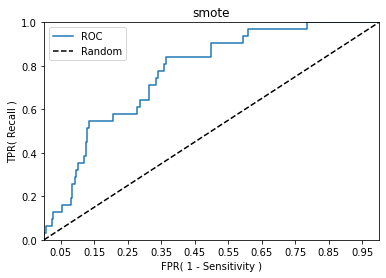

In [109]:
def roc_curve_plot(y_test , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(y_test, xgb_wrapper.predict_proba(X_test)[:, 1] )